In [14]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install beautifulsoup4


##Extract Tesla Stock Data

In [12]:
import yfinance as yf

# Create ticker object for Tesla
tesla_ticker = yf.Ticker("TSLA")

# Extract historical data with the maximum period
tesla_data = tesla_ticker.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first 5 rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


 ##Extracting Tesla Revenue Data Using Webscraping

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Extract the table
table = soup.find_all("table")[0]  # Assuming the Tesla table is the first one
tesla_revenue = pd.read_html(str(table))[0]

# Debug: Print the first few rows and column names
print(tesla_revenue.head())
print(tesla_revenue.columns)

# Adjust the column names if needed
if "Revenue" not in tesla_revenue.columns:
    tesla_revenue.rename(columns={tesla_revenue.columns[1]: "Revenue"}, inplace=True)

# Clean the Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Remove null and empty strings
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

# Display the last 5 rows
print(tesla_revenue.tail())


   GameStop Annual Revenue (Millions of US $)  \
0                                        2020   
1                                        2019   
2                                        2018   
3                                        2017   
4                                        2016   

  GameStop Annual Revenue (Millions of US $).1  
0                                       $6,466  
1                                       $8,285  
2                                       $8,547  
3                                       $7,965  
4                                       $9,364  
Index(['GameStop Annual Revenue (Millions of US $)', 'GameStop Annual Revenue (Millions of US $).1'], dtype='object')
    GameStop Annual Revenue (Millions of US $) Revenue
11                                        2009    8806
12                                        2008    7094
13                                        2007    5319
14                                        2006    3092
15                

Extracting GameStop Stock Data Using yfinance

In [19]:
# Create ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract historical data with the maximum period
gme_data = gamestop_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620129  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Extracting GameStop Revenue Data Using Webscraping

In [22]:
# Create ticker object for GameStop
gamestop_ticker = yf.Ticker("GME")

# Extract historical data with the maximum period
gme_data = gamestop_ticker.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first 5 rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Tesla Stock and Revenue Dashboard 

In [24]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Fetch the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Step 2: Extract the relevant table
table = soup.find_all("table")[1]  # Assume GameStop's table is the second one
gme_revenue = pd.read_html(str(table))[0]

# Debug: Inspect the DataFrame
print(gme_revenue.head())
print(gme_revenue.columns)

# Step 3: Rename columns if needed
# Check if 'Revenue' column exists
if "Revenue" not in gme_revenue.columns:
    # Rename the second column to 'Revenue' (adjust index if needed)
    gme_revenue.rename(columns={gme_revenue.columns[1]: "Revenue"}, inplace=True)

# Step 4: Clean the Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",|\$", "", regex=True)

# Step 5: Remove null or empty values
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

# Step 6: Display the last 5 rows
print(gme_revenue.tail())


  GameStop Quarterly Revenue (Millions of US $)  \
0                                    2020-04-30   
1                                    2020-01-31   
2                                    2019-10-31   
3                                    2019-07-31   
4                                    2019-04-30   

  GameStop Quarterly Revenue (Millions of US $).1  
0                                          $1,021  
1                                          $2,194  
2                                          $1,439  
3                                          $1,286  
4                                          $1,548  
Index(['GameStop Quarterly Revenue (Millions of US $)', 'GameStop Quarterly Revenue (Millions of US $).1'], dtype='object')
   GameStop Quarterly Revenue (Millions of US $) Revenue
57                                    2006-01-31    1667
58                                    2005-10-31     534
59                                    2005-07-31     416
60                           

Tesla Stock and Revenue Dashboard 

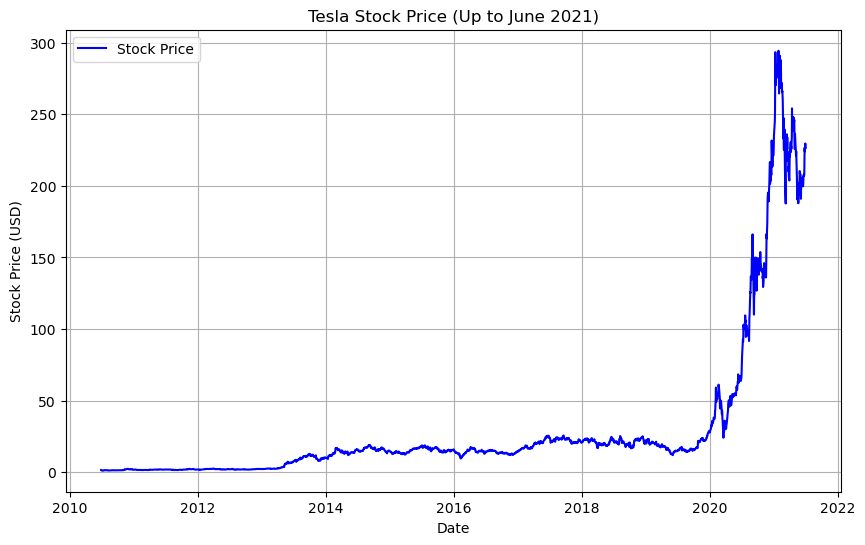

In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Step 2: Filter data up to June 2021
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Step 3: Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))
    
    # Plot stock prices
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    
    # Add labels and title
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid()
    plt.legend()
    plt.show()

# Step 4: Plot the Tesla stock graph
make_graph(tesla_data, None, 'Tesla Stock Price (Up to June 2021)')


GameStop Stock and Revenue Dashboard

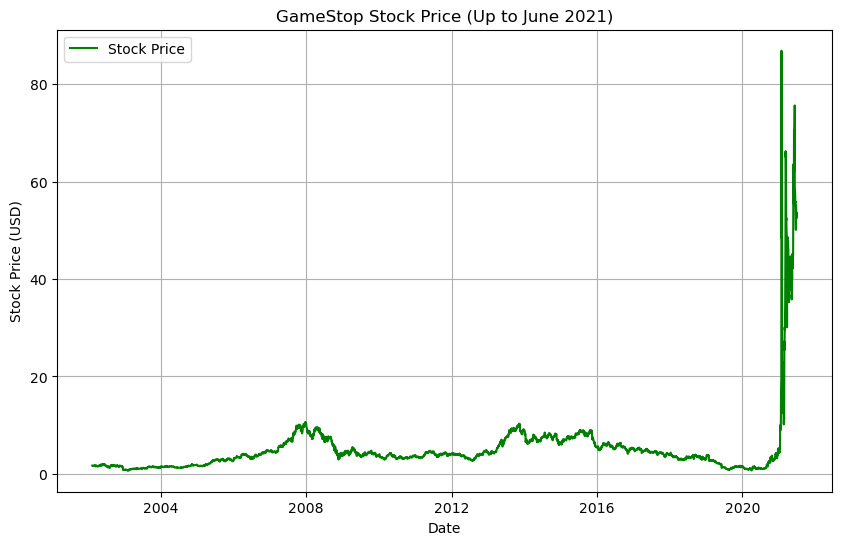

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Download GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()

# Step 2: Filter data up to June 2021
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data = gme_data[gme_data['Date'] <= '2021-06-30']

# Step 3: Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))
    
    # Plot stock prices
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='green')
    
    # Add labels and title
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.grid()
    plt.legend()
    plt.show()

# Step 4: Plot the GameStop stock graph
make_graph(gme_data, None, 'GameStop Stock Price (Up to June 2021)')
